# Project: Wrangle and analyze WeRateDogs Twitter data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering">Gathering Data</a></li>
<li><a href="#Assessing">Assessing Data</a></li>
<li><a href="#Cleaning">Cleaning Data</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#report">Reporting for this project</a></li>  
</ul>

<a id='intro'></a>
## Introduction

This Notebook focuses on the process of data wrangling which is composed of 3 steps:
- Gathering 
- Assessing
- Cleaning

Atfer wrangling the data in a quite thorough manner, a quick analysis will be performed. 

The data selected in this view is from Twitter. The data that we have comes from multiple sources including a manually downloaded file, a file from an online server and data from Twitter's API. A lot of processing must be done in order to wrangle this data. In the final steps, we will have a look at tweets from the famous profile WeRateDogs and derive trends from them. 

#### Set up the environment

In [1]:
# Import all the libraries used in this python notebook for the following analysis
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import timeit
import json
from PIL import Image
from io import BytesIO
import itertools

<a id='Gathering'></a>
## Gathering Data

In this part, we will gather data from 3 different sources in 3 different formats: 
- *A downloadable CSV file source* : Twitter enhanced archive data
- *An online server source TSV file* : Image prediction data based on tweets from the archive
- *An API JSON source data to load into a txt file* : Using API to get more data based on tweets from the archive (our main focus will be to gather retweet count and favorite count)

These datasets will then be read in a dataframe format using Pandas Library

### Dataset number 1 : downloadable CSV file source

The first dataset to be used for the following analysis is a *Twitter enhanced archive data file from the WeRateDogs Twitter profile*. It is saved in a CSV format in our folder

#### Step 1 and only : load data into pandas dataframe

In [2]:
# Create a dataframe and View Twitter enhanced archive dataset using pandas

df_twit_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twit_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> *this file was manually downloaded from Udacity's platform as part of the project materials*

### Dataset number 2 : online server source 

The second dataset to be used for the following analysis is a *tweet image prediction TSV file* hosted on Udacity servers

#### Step 1 : Download file programmatically

In [3]:
# Download programmatically the tweet image prediction file using Requests Library

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

if os.path.exists('tweet_image_pred.tsv') == True:
    print('file exists') #To avoid retrieval & creation of file error if code is re-run multiple times
    
else:
    r = requests.get(url)
    with open('tweet_image_pred.tsv', mode= 'wb') as file:
        file.write(r.content)
        print('file created')


file exists


#### Step 2 : load data into pandas dataframe

In [4]:
# Create a dataframe and View Tweet image prediction dataset using pandas

df_image_pred = pd.read_csv('tweet_image_pred.tsv', sep="\t")
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Dataset number 3 : API source

The third and last dataset to be used for the following analysis is a *tweet 'retweet count' and 'favorite count' (Likes) dataset* in JSON format retrieved by querying the twitter API

#### Step 1 : Authentication

In [ ]:
# Authenticate to access API data

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True , parser=tweepy.parsers.JSONParser())

# the parser helps to set the response from the API status call later into a JSON object 
# which makes it easier to then get the values we are looking for in retweet_count and favourite_count using JSON object functionalities

> **Some useful links**
>
> - For the tweepy code documentation: [here](https://buildmedia.readthedocs.org/media/pdf/tweepy/latest/tweepy.pdf)
- My link to twitter developper page: [here](https://developer.twitter.com/en/apps/17388315)
- Twitter WeRateDogs page: [here](https://twitter.com/dog_rates)
- Documentation for Twitter API - get tweets with specific id: [here](https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id)
- Convert tweepy status object into JSON: [here](https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json)

#### Step 2 : Load API JSON data into txt file

In [ ]:
# List for tweet ids in the archive that were not found via the API
tweet_id_without_record = []
# Creates "tweet_json.txt" file or empties it before the loop starts if file exists already 
open("tweet_json.txt", 'w').close()

# Loop to build a txt file were each line represent a tweet from the twitter archive of WeRateDogs in JSON format
for tweet_id in df_twit_archive.tweet_id:
        try:
                tweet = api.get_status(tweet_id, tweet_mode='extended') # gets tweet status in JSON format
                tweet_str = json.dumps(tweet) # tweet JSON serialized into a str format

                # append each tweet status from the loop in the tweet_json.txt file
                with open("tweet_json.txt","a") as file: 
                    file.write(tweet_str + '\n') # '+/n' adds a new line after each str that has been added
                print(tweet['id']) # print tweet id to check loop advancement
       # keep record of the tweet id if the tweet id can't be found via the API
        except Exception as e:
                print(str(tweet_id) + " error tweet not found")
                tweet_id_without_record.append(tweet_id)


> This operation above took more than one hour. Expect it if you re-run it.

#### Step 3 : Perform multipe checks on the txt file to verify it looks as expected

In [5]:
# Check how file looks and feel

with open("tweet_json.txt","r") as file:
     print(file.read(10000))

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 540, "h": 528, "resize": "fit"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "large": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

In [6]:
# Count lines in JSON file - 1 line is one tweet
num_lines = sum(1 for line in open("tweet_json.txt"))
print(num_lines)

2331


In [7]:
# Count tweets in tweet ids archive
num_tweets = df_twit_archive.tweet_id.count()
num_tweets

2356

In [109]:
# Count tweets that were not found via the API
num_tweet_id_without_record = len(tweet_id_without_record)
num_tweet_id_without_record

25

In [110]:
# Check if the number of lines in txt JSON file is correct based on the archive of tweets we queried
num_lines == num_tweets - num_tweet_id_without_record

True

> OK the count of number of lines in the tweet_json.txt file corroborates with number of lines in twitter archive dataset minus the exceptions where the tweet id was not found via the API. It looks like we can go on and use this file to build the dataframe containing:
- tweet_id
- retweet_count 
- favourite_count
>
> Each of these values are found in each line of the txt file. Indeed 1 line represents 1 tweet.

#### Step 4 : Gather the selected data from the txt file in a list

In [8]:
tweet_API_list = [] # list for the loop to find lines in tweet_json.txt file
tweet_API_list_for_df = [] # list of dictionaries that will be used to build the final dataframe

# Open the txt file in read mode and put each line of the txt file in a list
with open("tweet_json.txt","r") as f:
    tweet_API_list = f.readlines() # readlines() returns a list of items, each item is a line in tweet_jon.txt file

# Loop to retrieve values for the dataframe for each tweet
i = 0
while i < len(tweet_API_list): 
        tweet_line_i = json.loads(tweet_API_list[i]) # JSON representing tweet i
        i += 1
        tweet_id = tweet_line_i['id'] # get the tweet id of tweet i
        retweet_count = tweet_line_i['retweet_count'] # get retweet count of tweet i
        favorite_count = tweet_line_i['favorite_count'] # get favorite count of tweet i

        # Append to list of dictionaries
        tweet_API_list_for_df.append({'tweet_id': tweet_id,
                            'retweet_count': retweet_count,
                            'favorite_count': favorite_count})

    

#### Step 5 : load data into pandas dataframe

In [9]:
# Create DataFrame from list of dictionaries
df_tweet_API = pd.DataFrame(tweet_API_list_for_df, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

df_tweet_API

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7801,36615
1,892177421306343426,5776,31553
2,891815181378084864,3824,23769
3,891689557279858688,7959,39936
4,891327558926688256,8604,38147
...,...,...,...
2326,666049248165822465,41,99
2327,666044226329800704,133,273
2328,666033412701032449,41,114
2329,666029285002620928,43,121


>It looks like our dataframe also has the correct number of rows. As expected it is the same number of rows as for the JSON txt file

<a id='Assessing'></a>
## Assessing Data

In this second step, eight (8) quality issues and two (2) tidiness issues will be detected and documented. It has been done by looking at the data programmatically using useful pandas features and also visually by looking at the dataframe and random samples of it.

> Following these requirements: 
>
>*- Keep only original ratings (no retweets) that have images.*
>
>*- Cleaning includes merging individual pieces of data according to the rules of tidy data.*
>
>*- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.*
>
>*- No need to gather the tweets beyond August 1st, 2017.*

#### Dataset 1: Twitter archive data

##### Info summary of the table

In [10]:
df_twit_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> At first glance it looks like there is some missing data in at least 6 columns:
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- expanded_urls

> Secondly, datatypes look non-optimal for (*and should be as type* **in bold**): 
- tweet_id **as str/object**
- in_reply_to_status_id **as int**
- in_reply_to_user_id **as int**
- timestamp **as datetime**
- retweeted_status_id **as int**
- retweeted_status_user_id **as int**
- retweeted_status_timestamp **as datetime** 

##### Let's have a look at the dataframe view

In [11]:
df_twit_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


##### Explore rows with missing data

In [12]:
# check values in in_reply_to_status_... columns
df_twit_archive[df_twit_archive.in_reply_to_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


> A priori, it looks normal that not all columns have information. The title of the columns suggests that there should be an id value only if the tweet has got a reply to a status or something like that. For the later analysis, this does not feel like valuable information for the analysis also seeing how little of these rows have a value compared to the dataset. Let's keep it as such for now.

In [13]:
# check values in retweet _status_... columns
df_twit_archive[df_twit_archive.retweeted_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


> It may be that these columns serve us to identify retweets, so it looks normal that not all columns have information. Retweets will make the analysis for dog ratings flawed.

##### Check for other issues

> Some dogs seem to have no name and the columns doggo, floofer, pupper and puppo seem to rarely have a qualifier. Let's check it.

In [14]:
df_twit_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
            ... 
Sprinkles      1
Margo          1
William        1
Hamrick        1
Beemo          1
Name: name, Length: 957, dtype: int64

In [15]:
df_twit_archive.query('name == "a"')['text']

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

> The name given "a" is unvalid. Actually it looks like all the text related contains a sentence saying: "This is **a**..."

> Let's check if lower cases names are wrong

In [16]:
df_twit_archive[df_twit_archive.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [17]:
df_twit_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [18]:
df_twit_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

> It looks like the 4 variables doggo floofer, pupper and puppo values would fit better all in one category column

In [19]:
df_twit_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

> Ratings above 20 seem too suspicious to be accurate. Let's check

In [20]:
# Enlarge view of the text column to verify ratings associated
pd.options.display.max_colwidth = 200

In [21]:
df_twit_archive.query('rating_numerator > 20')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150


In [22]:
df_twit_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitte

In [23]:
# Index of tweets rating denominators that do not equal 10
df_twit_archive.query('rating_denominator != 10').index

Int64Index([ 313,  342,  433,  516,  784,  902, 1068, 1120, 1165, 1202, 1228,
            1254, 1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843,
            2335],
           dtype='int64')

> All tweets showing a denominator not equal to 10 look like their ratings are wrong. There are float ratings on index 340/ 695/ 763/ 1712 which can be corrected in the dataset.

In [24]:
df_twit_archive[df_twit_archive.text.str.contains("@dog_rates")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,http...",13,10,Canela,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,http...",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748977405889503236/photo/1,10,10,not,None,None,None,None
1012,747242308580548608,NaN,NaN,2016-06-27 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This pupper killed this great white in an epic sea battle. Now wears it as a trophy. Such brave. Much fierce. 13/10 https://…,7.047611e+17,4.196984e+09,2016-03-01 20:11:59 +0000,"https://twitter.com/dog_rates/status/704761120771465216/photo/1,https://twitter.com/dog_rates/status/704761120771465216/photo/1",13,10,None,None,None,pupper,None
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help.

#### Assess duplicates

In [25]:
df_twit_archive[df_twit_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


> No tweet id duplicated

#### Dataset 2 : Image prediction data

##### Info summary of the table

In [26]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Let's have a look at the dataframe view

In [27]:
df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


##### Explore rows with missing data

> No apparent missing data

##### Check for other issues

In [28]:
df_image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
wild_boar               1
revolver                1
four-poster             1
desktop_computer        1
coil                    1
Name: p1, Length: 378, dtype: int64

> dog race sometimes are spelled only with lower cases and sometimes with an upper case in the first letter. 

> What can be annoying though for the rest of the analysis and that can be assessed as a quality issue is the prediction. It is confusing to face 3 different predictions and understand which is the prediction that should be used in the analysis. It would be more consistent to have one prediction for each tweet in one column.

#### Assess duplicates

In [29]:
df_image_pred[df_image_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Dataset 3 : Tweet API data

##### Info summary of the table

In [30]:
df_tweet_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


##### Let's have a look at the dataframe view

In [31]:
df_tweet_API

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7801,36615
1,892177421306343426,5776,31553
2,891815181378084864,3824,23769
3,891689557279858688,7959,39936
4,891327558926688256,8604,38147
...,...,...,...
2326,666049248165822465,41,99
2327,666044226329800704,133,273
2328,666033412701032449,41,114
2329,666029285002620928,43,121


##### Explore rows with missing data

> No apparent missing data

##### Check for other issues

#### Assess duplicates

In [32]:
df_tweet_API[df_tweet_API.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [33]:
# check duplicated columns across tables to analyse
all_columns = pd.Series(list(df_twit_archive)+list(df_image_pred)+list(df_tweet_API))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

> Shows that all tables have tweet_id in common, which is a reason to merge them all in in one

#### Assessement Conclusions

##### Quality


**1. `twitter archive` dataframe**
- Datatypes look non-optimal for: tweet_id, in_reply_to_status_id, in_reply_to_user_id , timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- The columns in_reply_to_status_id, in_reply_to_user_id look like they have no use in this analysis
- There are 181 rows corresponding to retweets which represents a sort of a duplicate of our dog ratings
- Names of dogs called "a"/ or any name with only lower case are wrong values because they do not correspond to the name of the dog
- A rating denominator different than 10 is wrong
- The rating numerator at row index # 340 is 75 and it should be 9.75 or rounded at 10. Rows at index 340/ 695/ 763/ 1712 all have wrong numbers because their ratings were float.

**2. `image prediction` dataframe**
- Datatypes look non-optimal for: tweet_id
- The predictions can be confusing as there are several, and for the analysis only one column should be used for better consistency. It would be better to group the best of the 3 predictions in one column
- p1,p2 and p3 or dog breeds show a mix of lower case or upper cases which is inconsistent

**3. `tweet API` dataframe**
- Datatypes look non-optimal for: tweet_id

###### Tidiness

- In `twitter archive` dataframe, the columns doggo floofer, pupper and puppo values would fit better all in one category column
- In the `image prediction` dataframe, the 3 predictions should be grouped into one prediction, however it will be taken care of in the quality issues because there is a need to sort which is the best of the 3 predicitions in terms of quality and consistency
- All the data should be in one table because it is all related to the same object, *the tweet id*

<a id='Cleaning'></a>
## Cleaning Data

The cleaning process follows along to correct each data issue detected in the assessment. There are 3 steps for each issue:
-	Define how the issue will be corrected
-	Code to correct the issue
-	Test if the issue was corrected
Finally the end result clean dataset will be stored in a master csv file ‘twitter_archive_master.csv’

In [34]:
# Create a copy of the datasets to be cleaned
df_twit_archive_clean = df_twit_archive.copy()
df_image_pred_clean = df_image_pred.copy()
df_tweet_API_clean = df_tweet_API.copy()

##### Start with the data to remove

> **Quality issue 1**: *There are 181 rows corresponding to retweets which represents a sort of a duplicate of our dog ratings*

**Define**

Remove the 181 rows which are retweets (duplicated tweets)

**Code**

In [35]:
# First get rid of the duplicated rows
df_twit_archive_clean.drop(df_twit_archive_clean[df_twit_archive_clean.retweeted_status_id.notna()].index, axis = 0, inplace= True)

In [36]:
# Then get rid of these columns as they will not be useful
df_twit_archive_clean.drop(labels= ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis= 1, inplace=True)

**Test**

In [37]:
df_twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


> **Quality issue 2**: *The columns in_reply_to_status_id, in_reply_to_user_id look like they have no use in this analysis*

**Define**

Remove the columns *in_reply_to_status_id, in_reply_to_user_id* 

**Code**

In [38]:
# Get rid of these columns as they will not be useful
df_twit_archive_clean.drop(labels= ['in_reply_to_status_id', 'in_reply_to_user_id'], axis= 1, inplace=True)

**Test**

In [39]:
df_twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


##### Correction of data types

> **Quality issue 3** : *Datatypes look non-optimal for: tweet_id, in_reply_to_status_id, in_reply_to_user_id , timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp*

Note: Only timestamp and tweet_id column are left because other columns were deleted from the dataset in the cleaning step just above

**Define**

 - Correct the `timestamp` column datatype from object to datetime
 - Correct the `tweet_id`column datatype from int to object (str) in the 3 datasets

**Code**

In [40]:
df_twit_archive_clean['timestamp'] = pd.to_datetime(df_twit_archive_clean.timestamp)

In [41]:
df_twit_archive_clean['tweet_id'] = df_twit_archive_clean.tweet_id.astype(str)

In [42]:
df_image_pred_clean['tweet_id'] = df_image_pred_clean.tweet_id.astype(str)

In [43]:
df_tweet_API_clean['tweet_id'] = df_tweet_API_clean.tweet_id.astype(str)

**Test**

In [44]:
df_twit_archive_clean.timestamp.dtype

datetime64[ns, UTC]

In [45]:
df_twit_archive_clean.tweet_id.dtype

dtype('O')

In [46]:
df_image_pred_clean.tweet_id.dtype

dtype('O')

In [47]:
df_tweet_API_clean.tweet_id.dtype

dtype('O')

##### Correction of accuracy and invalidity issues

> **Quality issue 4** : *Names of dogs called "a"/ or any name with only lower case are wrong values because they do not correspond to the name of the dog*

**Define**

Replace all invalid names (identified with only lower case letters) by NAN

**Code**

In [48]:
df_twit_archive_clean.loc[df_twit_archive_clean[df_twit_archive_clean.name.str.islower() == True].index, ['name']] = np.nan

**Test**

In [49]:
df_twit_archive_clean[df_twit_archive_clean.name.str.islower() == True]['name']

Series([], Name: name, dtype: object)

> **Quality issue 5** : *The rating numerator Row index # 340 is 75 and it should be 9.75 or rounded at 10. Rows at index 340/ 695/ 763/ 1712 all have wrong numbers because their ratings were float.*

**Define**

Replace wrong numerator rating with the correct one found in the text column

**Code**

In [50]:
# Check our rows to correct
df_twit_archive_clean.loc[[340,695,763,1712],['text','rating_numerator', 'rating_denominator']]

/Users/lauranne.kerkhove/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,rating_numerator,rating_denominator
340,NaN,NaN,NaN
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


In [51]:
# Note: index 340 must have been a retweet - just to check
df_twit_archive.loc[340,:]

tweet_id                                                                                                                                                832215909146226688
in_reply_to_status_id                                                                                                                                                  NaN
in_reply_to_user_id                                                                                                                                                    NaN
timestamp                                                                                                                                        2017-02-16 13:11:49 +0000
source                                                                                  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                          RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.7

In [52]:
# Extract rating from the text with the correct regexp
rating = df_twit_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
# Check our spotted errors (minus the retweet)
rating.loc[[695,763,1712]]

,rating_numerator,rating_denominator
695,9.75,10
763,11.27,10
1712,11.26,10


In [59]:
# Replace numerator/denominator columns with correct values
df_twit_archive_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
df_twit_archive_clean['rating_denominator'] = rating['rating_denominator'].astype(int)

###### **Test**

In [60]:
df_twit_archive_clean.loc[[695,763,1712],['text','rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


> **Quality issue 6** : *A rating denominator different than 10 is wrong*

**Define**

For rating denominators that are different from 10, replace rating numerators and denominators by NAN because the whole rating is erroneous

**Code**

In [64]:
df_twit_archive_clean.loc[df_twit_archive_clean.query('rating_denominator != 10').index, ['rating_numerator', 'rating_denominator']] = np.nan



**Test**

In [65]:
df_twit_archive_clean.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,None,None,None,None,None
342,832088576586297345,2017-02-16 04:45:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",NaN,NaN,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",NaN,NaN,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,NaN,NaN,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",NaN,NaN,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,NaN,NaN,NaN,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,NaN,NaN,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,NaN,NaN,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,NaN,NaN,None,None,None,None,None


* As a bonus cleaning, let's just get rif of the rating_denominator column as it has no value added in the dataset

In [66]:
# drop rating denominator column
df_twit_archive_clean.drop(labels='rating_denominator', axis= 1, inplace= True)

In [67]:
# Change the name of the column to rating_on_10
df_twit_archive_clean.rename(columns = {"rating_numerator":"rating_on_10"}, inplace= True)

> **Quality issue 7** : *The predictions can be confusing as there are several, and for the analysis only one column should be used for better consistency. It would be better to group the best of the 3 predictions in one column*

**Define**

Instead of having 3 predictions with 3 confidence levels associated, we want 1 prediction with 1 confidence level associated. To do so, we want to select the prediction which has the highest confidence level and True breed evaluation.

**Code**

In [68]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [69]:
df_image_pred_clean.query('p1_conf < p2_conf')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [70]:
df_image_pred_clean.query('p2_conf < p3_conf')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


> ==> P1 confidence is always the biggest confidence level and then p2 and p3

*Knowing that predictions are in an ascending order of confidence level, we can select the first prediction which has a true breed naming and then its confidence level. There is a great trick that we can use thanks to numpy to facilitate this multiple condition operation: [np.select](https://docs.scipy.org/doc/numpy/reference/generated/numpy.select.html)*

In [71]:
# Form the prediction column

#List of conditions for predictions selection
condlist = [df_image_pred_clean['p1_dog'] == True,df_image_pred_clean['p2_dog'] == True,df_image_pred_clean['p3_dog'] == True]

# List what will be returned if the condition on the list above is true
choicelist = [df_image_pred_clean['p1'],df_image_pred_clean['p2'],df_image_pred_clean['p3']]

# Build 1 prediction column
df_image_pred_clean['breed_prediction'] = np.select(condlist,choicelist, default = 'None')


In [72]:
# Form the confidence level column

#List of conditions for confidence level selection
condlist = [df_image_pred_clean['p1_dog'] == True,df_image_pred_clean['p2_dog'] == True,df_image_pred_clean['p3_dog'] == True]

# List what will be returned if the condition on the list above is true
choicelist = [df_image_pred_clean['p1_conf'],df_image_pred_clean['p2_conf'],df_image_pred_clean['p3_conf']]

# Build 1 confidence level column
df_image_pred_clean['breed_pred_conf'] = np.select(condlist,choicelist, default = 0)


In [73]:
# Finally drop the other columns that are unnecessary to the rest of the analysis
df_image_pred_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog',], axis = 1, inplace= True)


**Test**

In [74]:
df_image_pred_clean.head()

,tweet_id,jpg_url,img_num,breed_prediction,breed_pred_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


> **Quality issue 8** : *p1,p2 and p3 or dog breeds show a mix of lower case or upper cases which is inconsistent*

**Define**

Redefine all breed_prediction namings column into lower case letters so that it will be all homogenous

**Code**

In [75]:
df_image_pred_clean.breed_prediction = df_image_pred_clean.breed_prediction.str.lower()

**Test**

In [76]:
df_image_pred_clean.breed_prediction.str[0]

0       w
1       r
2       g
3       r
4       m
       ..
2070    b
2071    l
2072    c
2073    c
2074    n
Name: breed_prediction, Length: 2075, dtype: object

##### Wrap up data cleaning with correction of tidiness issues

> **Tidiness issue 1** : *In twitter archive dataframe, the columns doggo floofer, pupper and puppo values would fit better all in one category column*

**Define**

Gather the 4 variables doggo, floofer, pupper and puppo into one category column

**Code**

In [77]:
# Just to clean up, let's replace all the None by NAN
df_twit_archive_clean.replace('None', np.nan, inplace=True)

# Create a quick dataframe where there is the unpivoted categories in one column
unpivot_dog_category = pd.melt(df_twit_archive_clean, id_vars= 'tweet_id' , value_vars = ['doggo','floofer','pupper','puppo'], value_name= 'dog_category' )
unpivot_dog_category

# Drop all the rows with no value
unpivot_dog_category.drop(unpivot_dog_category[unpivot_dog_category.dog_category.isna()].index, axis = 0, inplace= True)

# Join the value column to the df
df_twit_archive_clean = df_twit_archive_clean.join(unpivot_dog_category.set_index('tweet_id'), on = 'tweet_id')

# Drop the unnecessary columns
df_twit_archive_clean.drop(['doggo','floofer','pupper','puppo', 'variable'], axis = 1, inplace= True)

# Set the datatype of dog category to category
df_twit_archive_clean.dog_category = df_twit_archive_clean.dog_category.astype('category')

**Test**

In [78]:
df_twit_archive_clean.dog_category.value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: dog_category, dtype: int64

> **Tidiness issue 2** : *All the data should be in one table because it is all related to the same object, the tweet id*

**Define**

Merge (left) the 3 data sets on tweet id based on the twitter archive clean dataset

**Code**

In [79]:
# Merge the 3 clean datasets
df_twitter_archive_master = df_twit_archive_clean.merge(df_image_pred_clean, on = 'tweet_id', how = 'left').merge(df_tweet_API_clean, on = 'tweet_id', how = 'left')

# Reset index
df_twitter_archive_master.reset_index(drop= True, inplace = True)

**Test**

In [80]:
# View the Master dataset
df_twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_on_10,name,dog_category,jpg_url,img_num,breed_prediction,breed_pred_conf,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,none,0.000000,7801.0,36615.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,5776.0,31553.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,3824.0,23769.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever,0.168086,7959.0,39936.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,8604.0,38147.0


In [81]:
# Check the count of values by column
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 14 columns):
tweet_id            2187 non-null object
timestamp           2187 non-null datetime64[ns, UTC]
source              2187 non-null object
text                2187 non-null object
expanded_urls       2129 non-null object
rating_on_10        2165 non-null float64
name                1395 non-null object
dog_category        356 non-null category
jpg_url             2005 non-null object
img_num             2005 non-null float64
breed_prediction    2005 non-null object
breed_pred_conf     2005 non-null float64
retweet_count       2180 non-null float64
favorite_count      2180 non-null float64
dtypes: category(1), datetime64[ns, UTC](1), float64(5), object(7)
memory usage: 224.6+ KB


> All looks good and ready to be stored in a csv file

##### Store the final dataframe into a new csv file

In [82]:
df_twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

-	Number of tweets overtime? How is the WeRateDogs general account activity?
-	Which is the most retweeted post vs most favorite post? 
-	What makes a good dog rating? -  correlation between rating, retweet and favorite?/  Dog category?
-	What is the best name for a dog?
-	How good is the prediction of the dog breed? Check confidence level ranges and test image


#### How is the activity of tweets overtime in the WeRateDogs twitter account?

In [83]:
# Create date column
df_twitter_archive_master['date'] = df_twitter_archive_master.timestamp.dt.date

In [84]:
# Create year column
df_twitter_archive_master['year'] = df_twitter_archive_master.timestamp.dt.year

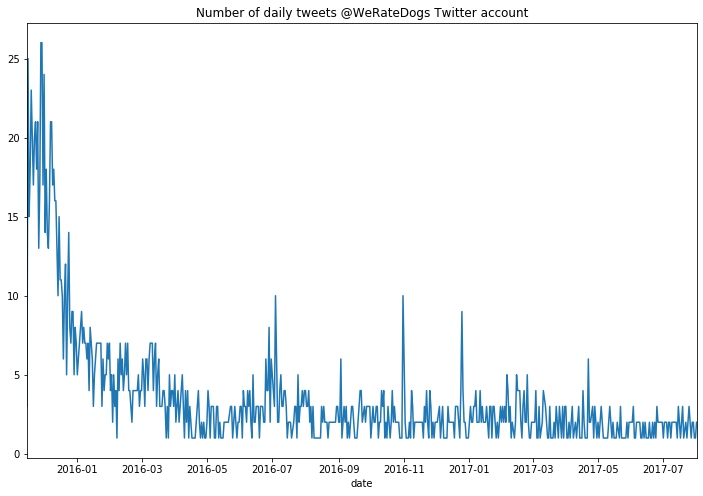

In [91]:
# Vizualise daily time series of tweets
df_twitter_archive_master.groupby('date').size().plot(figsize = (12,8), title = 'Number of daily tweets @WeRateDogs Twitter account');

In [86]:
# Table of yearly time series of tweets
df_twitter_archive_master.groupby('year').size()

year
2015     688
2016    1097
2017     402
dtype: int64

> The dataset is looking at mostly the twitter account activity for year 2016 and partly looking at 2015 and 2017. End of 2015, the tweet activity was quite high, then it became lower and more regular at a daily pace.

#### Which is the most retweeted post vs most favorite dog post?

In [87]:
# Most retweeted dog
df_twitter_archive_master[df_twitter_archive_master.retweet_count == df_twitter_archive_master.retweet_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_on_10,name,dog_category,jpg_url,img_num,breed_prediction,breed_pred_conf,retweet_count,favorite_count,date,year
872,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,labrador_retriever,0.825333,78839.0,158222.0,2016-06-18,2016


In [88]:
# Most favorite dog
df_twitter_archive_master[df_twitter_archive_master.favorite_count == df_twitter_archive_master.favorite_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_on_10,name,dog_category,jpg_url,img_num,breed_prediction,breed_pred_conf,retweet_count,favorite_count,date,year
872,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,labrador_retriever,0.825333,78839.0,158222.0,2016-06-18,2016


> The most retweeted Dog is also the favorite one of all. It looks like an interesting one. Let's check out his picture.

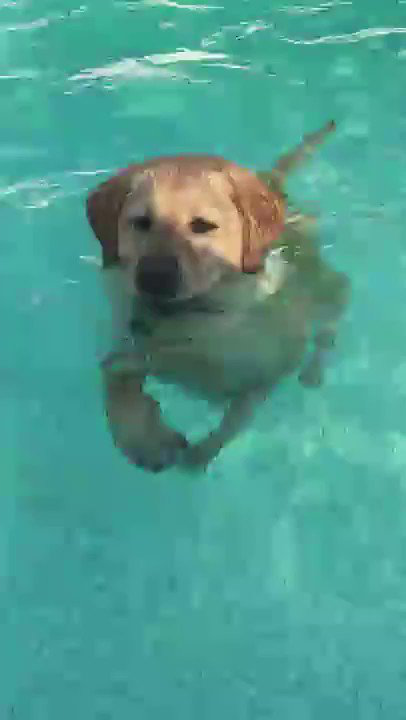

In [80]:
best_tweet_img_url = 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'
response = requests.get(best_tweet_img_url)
best_tweet_img = Image.open(BytesIO(response.content))
best_tweet_img

> What a cute doggo!

#### What makes a good dog rating? 
*correlation between rating, retweet and favorite? rating by dog category?*

/Users/lauranne.kerkhove/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


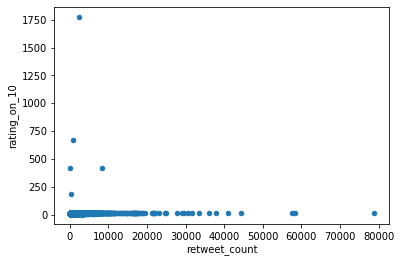

In [92]:
# View correlation between retwteets and rating
df_twitter_archive_master.plot.scatter( x = 'retweet_count', y= 'rating_on_10');

> No observed correlation but it might be due to the outliers. 

*Let's get rid of outliers for this question of the analysis.*

In [93]:
# New df without outliers for this analysis question 

#Remove rows with ratings above or equal to 20
df_twitter_archive_master_ratings = df_twitter_archive_master.query('rating_on_10 < 20')

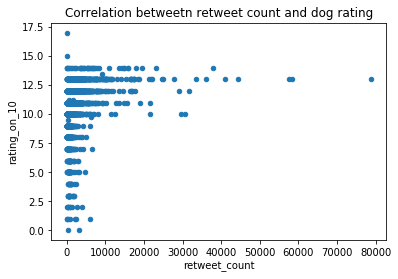

In [94]:
# View correlation between retwteets and rating without outliers
df_twitter_archive_master_ratings.plot.scatter( x = 'retweet_count', y= 'rating_on_10', title= 'Correlation betweetn retweet count and dog rating');

> There is a clear correlation between retweet count and dog ratings. If a dog is given a good rating, there is more chance for it to be retweeted.

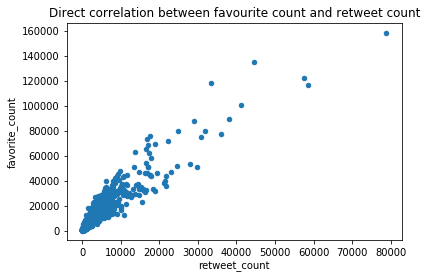

In [95]:
# Relationship with favourite count?
df_twitter_archive_master_ratings.plot.scatter( x = 'retweet_count', y= 'favorite_count', title= 'Direct correlation between favourite count and retweet count');

> More retweets is directly correlated with more likes on Twitter @WeRateDogs

In [96]:
# Is the rating influenced by the popularity of a breed?

# top 5 dog breeds
top_5_breeds = df_twitter_archive_master_ratings.breed_prediction.value_counts().nlargest(5).index
# top 6-10 dog breeds
top_10_breeds = df_twitter_archive_master_ratings.breed_prediction.value_counts().nlargest(10).index
top_6_10_breeds = top_10_breeds[5:]
# top 11-15 dog breeds
top_15_breeds = df_twitter_archive_master_ratings.breed_prediction.value_counts().nlargest(15).index
top_11_15_breeds = top_15_breeds[10:]
# bottom 100 dog breeds
bottom_100_breeds = df_twitter_archive_master_ratings.breed_prediction.value_counts().nsmallest(100).index

list_breeds = [top_5_breeds, top_6_10_breeds, top_11_15_breeds, bottom_100_breeds]
list_breeds_title = ['top_5_breeds', 'top_6_10_breeds', 'top_11_15_breeds', 'bottom_100_breeds']
df_list = []


for i,j in zip(list_breeds, list_breeds_title):
    # Filter the ratings df for top breeds
    df_ratings_top_breeds = df_twitter_archive_master_ratings[df_twitter_archive_master_ratings.breed_prediction.isin(i)]
    # Mean rating by top breed
    mean_rating_top_breed = df_ratings_top_breeds.mean()['rating_on_10'].round(1)
    

    # Append to list of dictionaries
    df_list.append({'top_breeds': j,
                       'top_breeds_list': list(i),
                       'mean_rating': mean_rating_top_breed})

In [97]:
df_ratings_by_top_breed = pd.DataFrame(df_list, columns = ['top_breeds','top_breeds_list', 'mean_rating'])
df_ratings_by_top_breed

,top_breeds,top_breeds_list,mean_rating
0,top_5_breeds,"[none, golden_retriever, labrador_retriever, pembroke, chihuahua]",10.3
1,top_6_10_breeds,"[pug, toy_poodle, chow, pomeranian, samoyed]",11.0
2,top_11_15_breeds,"[malamute, french_bulldog, chesapeake_bay_retriever, cocker_spaniel, miniature_pinscher]",10.9
3,bottom_100_breeds,"[bouvier_des_flandres, japanese_spaniel, standard_schnauzer, irish_wolfhound, silky_terrier, entlebucher, scotch_terrier, clumber, wire-haired_fox_terrier, sussex_spaniel, australian_terrier, groe...",10.5


> There is no pattern or clear distinction of the popularity of a dog breed on a rating @WeRateDogs. Looks like these good boys are rated based on love <3 

*Assumption: a real distinction could be hypothecised as from a mean rating difference of 1*

#### What is the best name for a dog?

In [98]:
# Top 5 names of most popular dogs 
df_twitter_archive_master.query('favorite_count > favorite_count.mean()').name.value_counts().nlargest(5)

Charlie    5
Bo         5
Stanley    4
Dave       4
Tucker     4
Name: name, dtype: int64

> Charlie and Bo are the most lovable dog names nowadays

##### How good is the prediction of the dog breed? 
*Check confidence level ranges and test image*

Histogram of confidence level (from 0 to 1) for dog breed predictions


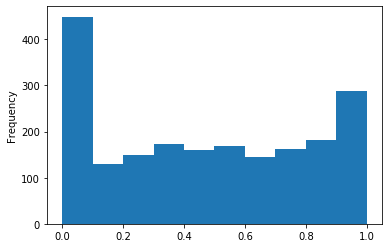

In [99]:
print('Histogram of confidence level (from 0 to 1) for dog breed predictions')
df_twitter_archive_master.breed_pred_conf.plot.hist();

> Breed predicitons confidence are spread. However, a good 20% of the dataset has a very low confidence. All in all, at first glance the prediction confidence is very average and not highly reliable.

Just for a sanity check, let's look at a top confidence predicition at about 80% and check the picture of the dog

In [109]:
# Get a sample of a dog's breed prediction at about 80% confidence level
df_test_pred = df_twitter_archive_master.query('breed_pred_conf > 0.8 & breed_pred_conf < 0.82  ').sample(1)
list(df_test_pred.breed_prediction)[0]

'german_shepherd'

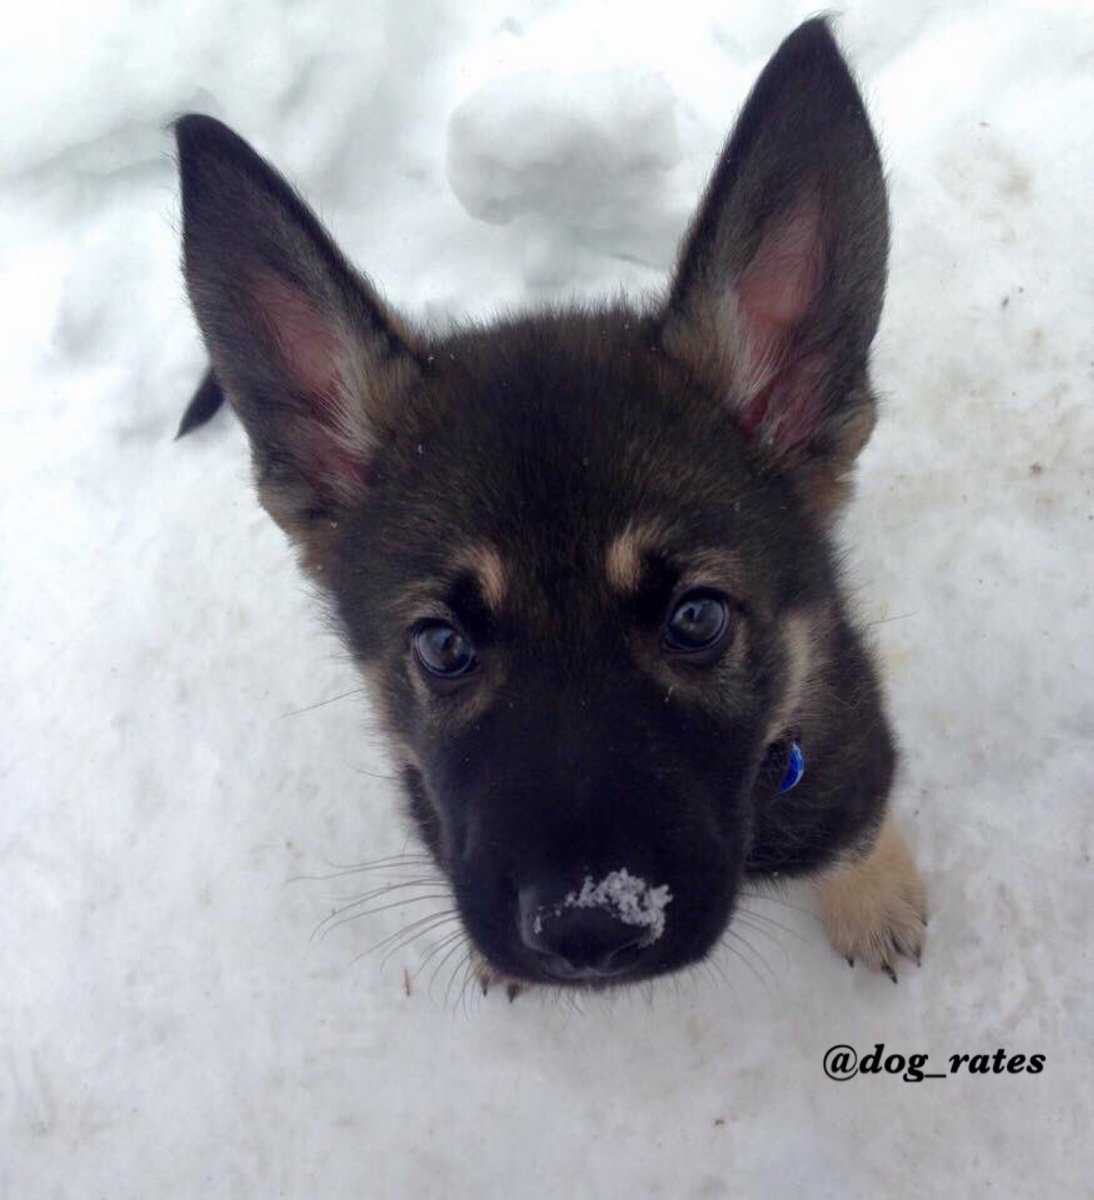

In [110]:
# Check visually the picture of the dog to see if it correspond to the breed predicted
test_tweet_img_url = list(df_test_pred.jpg_url)[0]
response = requests.get(test_tweet_img_url)
test_tweet_img = Image.open(BytesIO(response.content))
test_tweet_img

> We can re-run the 2 above cells several times to check the sample dog's picture. But after re-running it myself several times, I am statisfied of the quality of the prediction tool for 80% confidence level.

<a id='conclusions'></a>
## Conclusions

The analysis performed in this notebook has been done based on 3 datasets that have been gathered, assessed and cleaned in this same workbook. The wrangling of this data has allowed us to perform a quite cool analysis about the @WeRateDogs Twitter account from where the data came from. 

Here are a the insights of this analysis:

- End of 2015, the tweet activity was quite high, it was the ascendance of WeRateDogs Twitter account popularity! Then there were less tweet daily posts but they became more regular at a daily pace.
- The most retweeted dog is also the most loved with almost 80k retweets and more than 155k likes. It features a doggo Labrador retriever swimming in a pool for the first time with a rating of 13/10.
- A good rating is correlated with higher favorite counts and retweets @WeRateDogs
- Breed predictions confidence are spread. A good 20% of the dataset has a very low confidence. All in all, at first glance the prediction confidence is very average and not highly reliable. However, we tested some samples at 80% confidence level and were pretty pleased by the prediction, but maybe also by these cute little faces.

<a id='report'></a>
## Reporting for this Project

Find in the same folder as this Jupyter Notebook 2 reports in pdf format about this analysis to get quicker insights on the wrangle act.
- 'wrangle_report.pdf' : Explanation of the wrangle act process
- 'act_report.pdf': Insights from the wrangled data